In [14]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,auc,precision_recall_curve, roc_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from keras.utils import to_categorical


In [3]:
random_state = 2860 #5085
data = pd.read_csv('Data/encoded_data.csv')

In [4]:
X = data.drop(columns=['Output','X16'])  
y = data['Output']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [5]:
# Train the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=random_state)
random_forest.fit(X_train, y_train)

# Make predictions
rf_predictions = random_forest.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions)
recall = recall_score(y_test, rf_predictions)
f1 = f1_score(y_test, rf_predictions)

print("Accuracy:", accuracy)

# Define evaluation metrics dictionary
rf_metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}

# Get feature names from X_train
feature_names = X_train.columns.tolist()

# Save the trained model, feature names, and evaluation metrics using joblib
joblib.dump((random_forest, feature_names), 'Models/random_forest_model.pkl')


Accuracy: 0.9538461538461539


['Models/random_forest_model.pkl']

In [6]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(256, activation='relu'),  
    Dense(128, activation='relu'),  
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='sigmoid')  
])


nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = nn_model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_split=0.1, verbose=0)
nn_predictions = nn_model.predict(X_test).argmax(axis=1)


accuracy = accuracy_score(y_test, nn_predictions)
precision = precision_score(y_test, nn_predictions)
recall = recall_score(y_test, nn_predictions)
f1 = f1_score(y_test, nn_predictions)

print("Test Accuracy:", accuracy)

nn_metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}

nn_model.save('Models/neural_network_model.h5')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Test Accuracy: 0.9230769230769231


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='sigmoid', random_state=random_state)
svm_model.fit(X_train_scaled, y_train)

svm_predictions = svm_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, svm_predictions)
precision = precision_score(y_test, svm_predictions)
recall = recall_score(y_test, svm_predictions)
f1 = f1_score(y_test, svm_predictions)

print("Accuracy:", accuracy)


svm_metrics = {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}

joblib.dump((svm_model, scaler, svm_metrics), 'Models/svm_model.pkl')


Accuracy: 0.9384615384615385


['Models/svm_model.pkl']

In [8]:
rf_cm = confusion_matrix(y_test, rf_predictions)
nn_cm = confusion_matrix(y_test, nn_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)

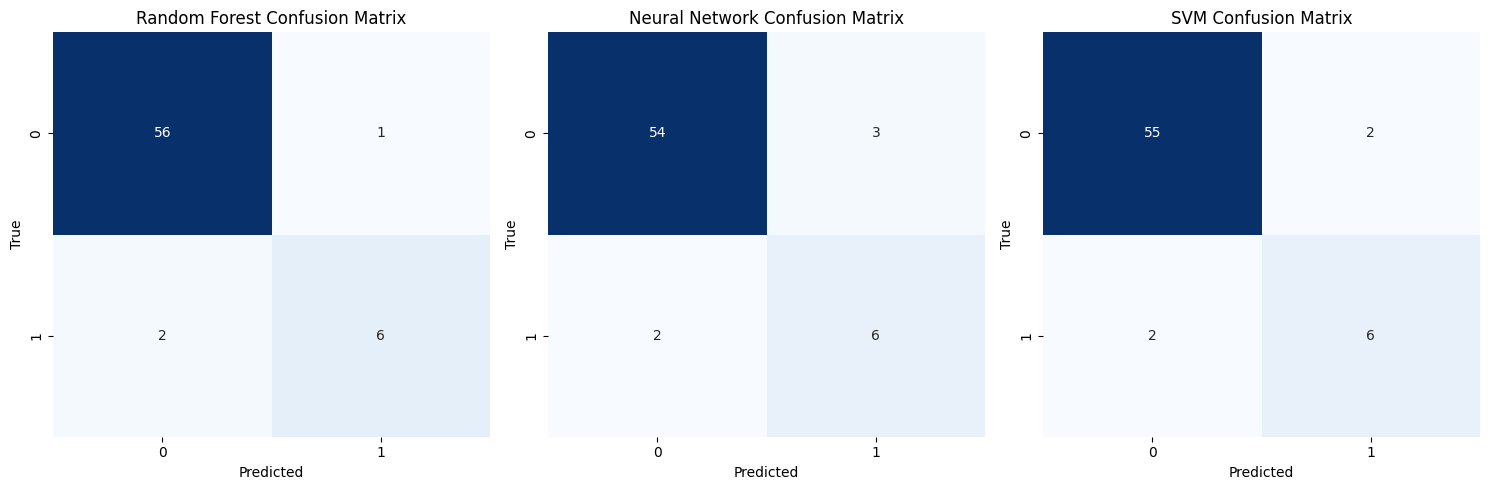

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 2)
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 3, 3)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

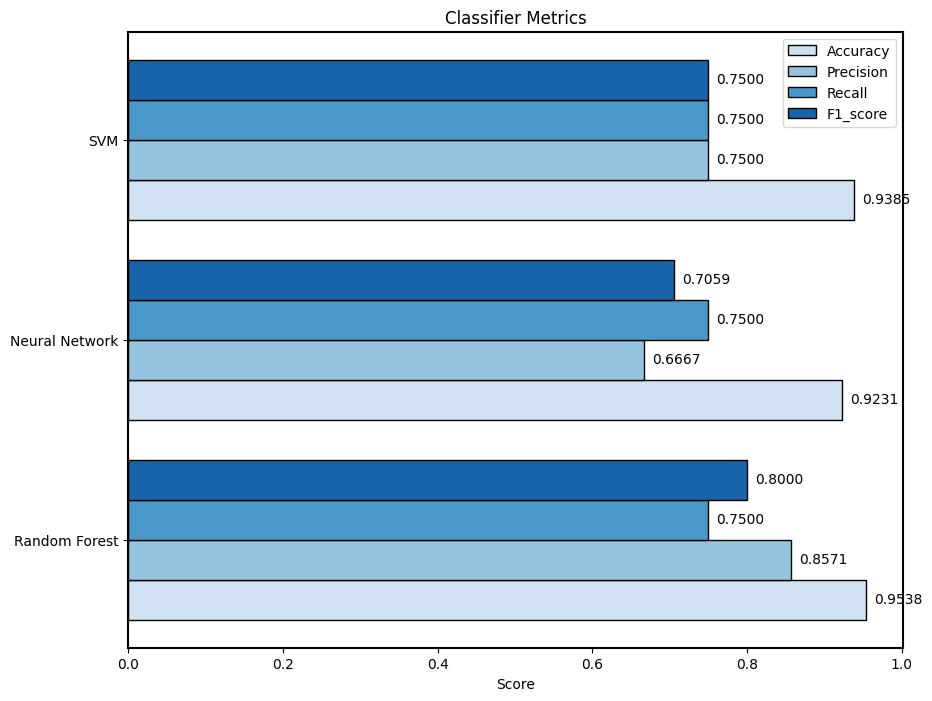

In [10]:
import numpy as np
import matplotlib.pyplot as plt

metrics = {'Random Forest': rf_metrics, 'Neural Network': nn_metrics, 'SVM': svm_metrics}
metrics_names = ['accuracy', 'precision', 'recall', 'f1_score']

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.2
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(metrics_names)))  # Adjusting color scheme to blue hues

for i, metric in enumerate(metrics_names):
    values = [m[metric] for m in metrics.values()]
    positions = np.arange(len(metrics)) + bar_width * (i - 1.5)  # Adjusting positions for each metric
    bars = ax.barh(positions, values, height=bar_width, label=metric.capitalize(), color=colors[i],
                   edgecolor='black', linewidth=1)  # Adding outline to each bar

    # Add text annotations for each bar
    for bar, value in zip(bars, values):
        ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{value:.4f}', va='center')

ax.set_yticks(np.arange(len(metrics)))
ax.set_yticklabels(metrics.keys())
ax.set_xlabel('Score')
ax.set_title('Classifier Metrics')
ax.legend()

# Increase the width of the outer lines
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

plt.show()


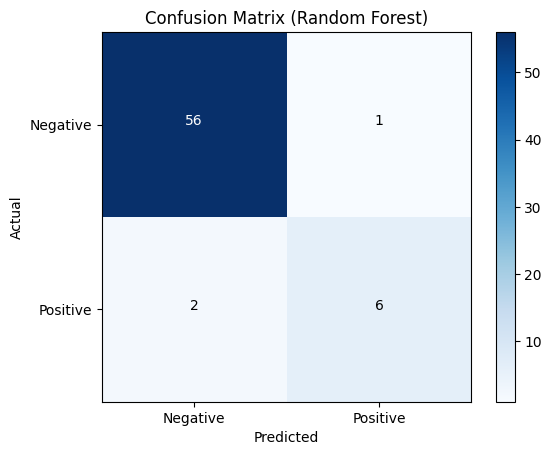

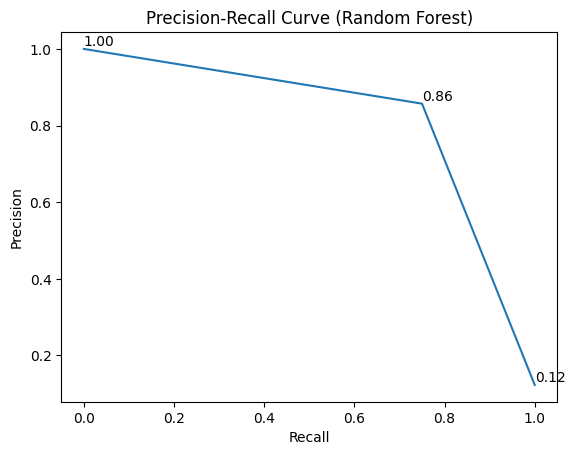

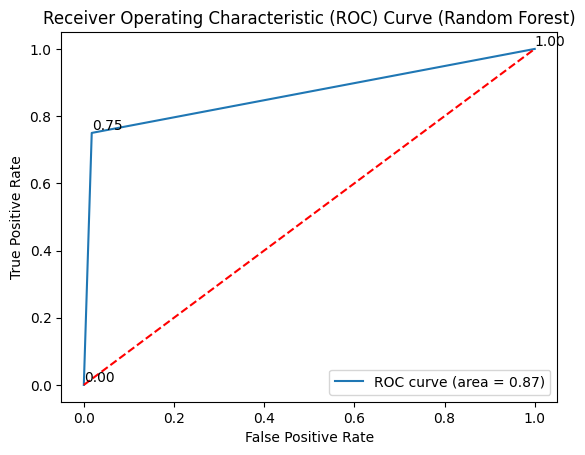

In [15]:
# Confusion Matrix with numbers for Random Forest
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)
plt.imshow(conf_matrix_rf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])

# Add numbers to the confusion matrix
thresh_rf = conf_matrix_rf.max() / 2.
for i in range(conf_matrix_rf.shape[0]):
    for j in range(conf_matrix_rf.shape[1]):
        plt.text(j, i, format(conf_matrix_rf[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if conf_matrix_rf[i, j] > thresh_rf else "black")

plt.show()

# Precision-Recall Curve with numbers for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_predictions)
plt.plot(recall_rf, precision_rf)
plt.title('Precision-Recall Curve (Random Forest)')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Add numbers to the precision-recall curve
for i in range(len(precision_rf)):
    plt.text(recall_rf[i], precision_rf[i], f'{precision_rf[i]:.2f}', verticalalignment='bottom')

plt.show()

# ROC Curve with numbers for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_predictions)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Add numbers to the ROC curve
for i in range(len(fpr_rf)):
    plt.text(fpr_rf[i], tpr_rf[i], f'{tpr_rf[i]:.2f}', verticalalignment='bottom')

plt.show()


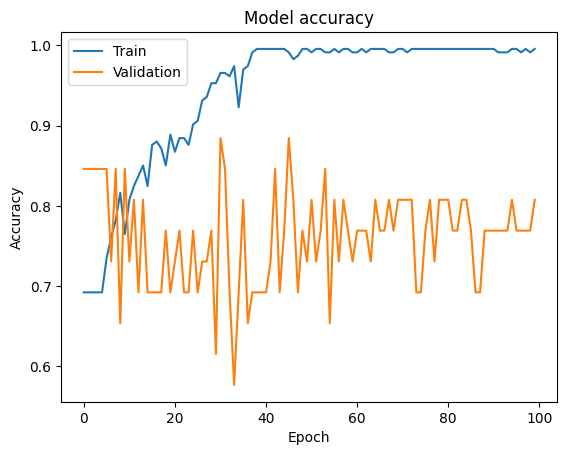

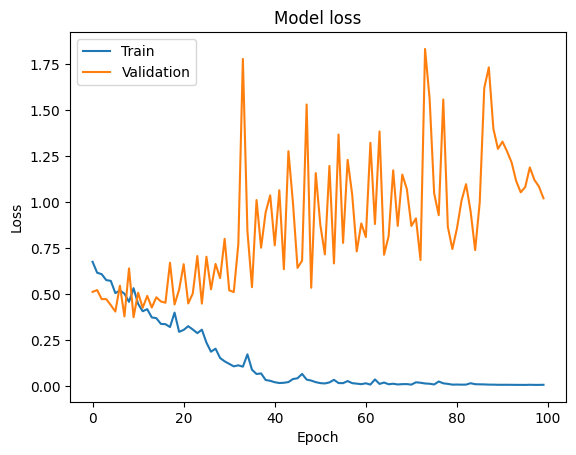

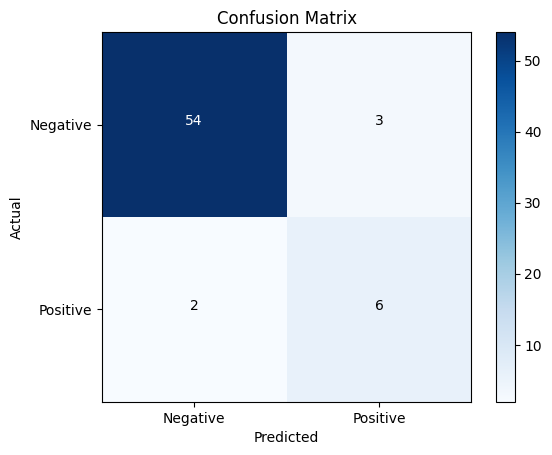

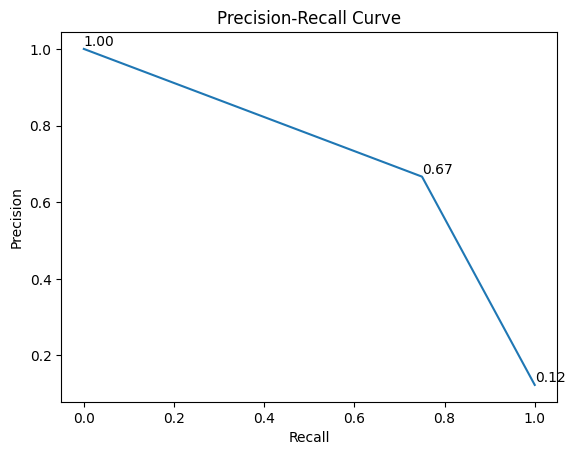

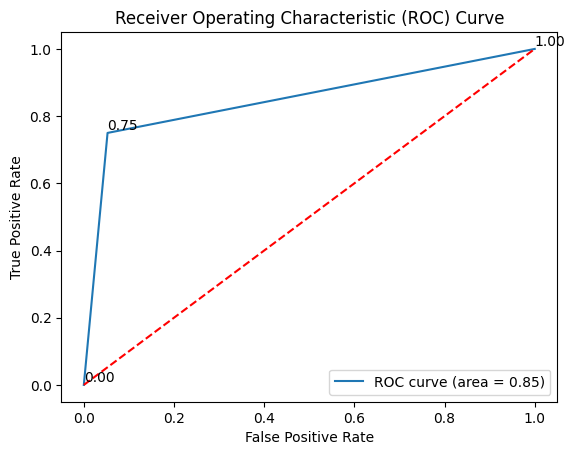

In [16]:
import numpy as np

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Confusion Matrix with numbers
cm = confusion_matrix(y_test, nn_predictions)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()

# Precision-Recall Curve with numbers
precision, recall, _ = precision_recall_curve(y_test, nn_predictions)
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Add numbers to the precision-recall curve
for i in range(len(precision)):
    plt.text(recall[i], precision[i], f'{precision[i]:.2f}', verticalalignment='bottom')

plt.show()

# ROC Curve with numbers
fpr, tpr, _ = roc_curve(y_test, nn_predictions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Add numbers to the ROC curve
for i in range(len(fpr)):
    plt.text(fpr[i], tpr[i], f'{tpr[i]:.2f}', verticalalignment='bottom')

plt.show()

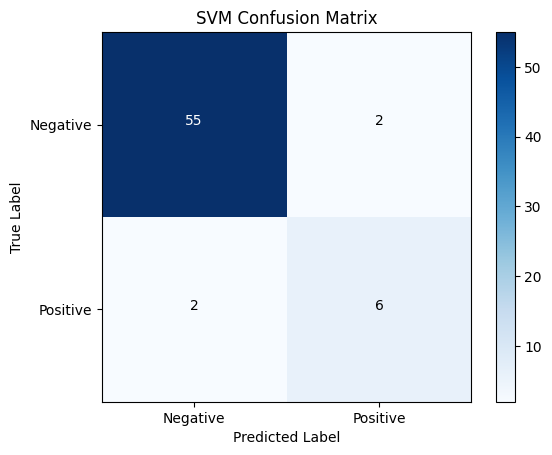

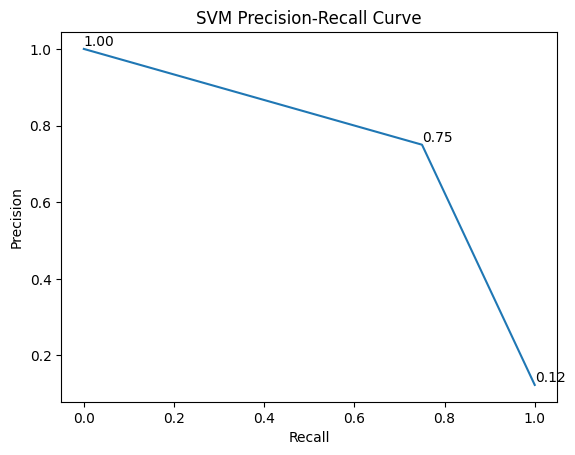

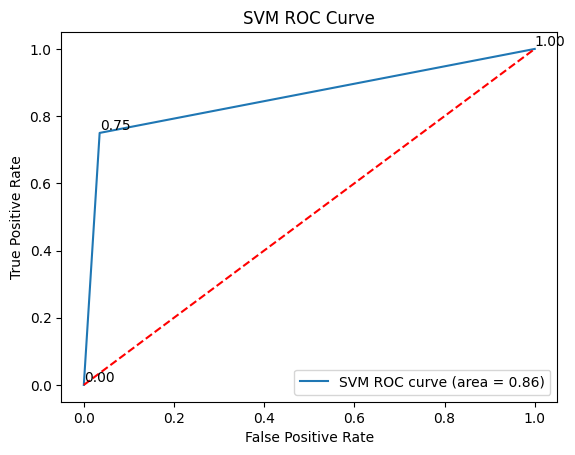

SVM Accuracy: 0.9384615384615385
SVM Precision: [0.12307692 0.75       1.        ]
SVM Recall: [1.   0.75 0.  ]
SVM F1 Score: 0.75


In [17]:


# Confusion Matrix with numbers
cm = confusion_matrix(y_test, svm_predictions)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('SVM Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])

# Add numbers to the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()

# Precision-Recall Curve with numbers
precision, recall, _ = precision_recall_curve(y_test, svm_predictions)
plt.plot(recall, precision)
plt.title('SVM Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Add numbers to the precision-recall curve
for i in range(len(precision)):
    plt.text(recall[i], precision[i], f'{precision[i]:.2f}', verticalalignment='bottom')

plt.show()

# ROC Curve with numbers
fpr, tpr, _ = roc_curve(y_test, svm_predictions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='SVM ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.title('SVM ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Add numbers to the ROC curve
for i in range(len(fpr)):
    plt.text(fpr[i], tpr[i], f'{tpr[i]:.2f}', verticalalignment='bottom')

plt.show()

# Print metrics
print("SVM Accuracy:", accuracy)
print("SVM Precision:", precision)
print("SVM Recall:", recall)
print("SVM F1 Score:", f1)